In [1]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
sys.path.append(os.path.abspath("../.."))  #TODO: MAKE THE SRC PACKAGE WORK
from src.training.train import train_autoencoder, train_cellfate
from src.evaluation.evaluate import *
from src.training.loss_functions import *
from src.preprocessing.preprocessing_functions import *
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from src.models import Encoder, Decoder, Discriminator, mlp_classifier, complex_mlp_classifier
from src.utils import *
from tensorflow.keras import layers, Sequential
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

In [3]:
# First frame

x_train = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/images/train_images_augmented.npy')[:,0,:,:]
y_train = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/labels/train_labels_augmented.npy')
x_test = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/images/test_images.npy')[:,0,:,:]
y_test = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/labels/test_labels.npy')

Training with batch size: 30, epochs: 15, learning rate: 0.001, seed: 44, latent dim: 2


/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/15: Reconstruction loss: 1.3784, Adversarial loss: 0.7635, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 2/15: Reconstruction loss: 0.8037, Adversarial loss: 0.7309, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 3/15: Reconstruction loss: 0.7664, Adversarial loss: 0.7170, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 4/15: Reconstruction loss: 0.7403, Adversarial loss: 0.7058, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 5/15: Reconstruction loss: 0.7372, Adversarial loss: 0.7007, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 6/15: Reconstruction loss: 0.7407, Adversarial loss: 0.7095, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 7/15: Reconstruction loss: 0.7188, Adversarial loss: 0.7045, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 8/15: Reconstruction loss: 0.7354, Adversarial loss: 0.7028, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 9/15: Reconstruction loss: 0.7330, Adversarial loss: 0.6967, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 10/15: Reconstruction 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_5 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3807 - loss: 0.8760 - val_accuracy: 0.4130 - val_loss: 0.7623
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.3845 - loss: 0.8087 - val_accuracy: 0.4203 - val_loss: 0.7330
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.4051 - loss: 0.7537 - val_accuracy: 0.4493 - val_loss: 0.7077
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.4287 - loss: 0.7151 - val_accuracy: 0.5145 - val_loss: 0.6894
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.5431 - loss: 0.6910 - val_accuracy: 0.6377 - val_loss: 0.6749
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5821 - loss: 0.6752 - val_accuracy: 0.6377 - val_loss: 0.6631
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6110 - loss: 0.6611 - val_accuracy: 0.6522 - val_loss: 0.6530
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6416 - loss: 0.6507 - val_accuracy: 0.6522

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6374 - loss: 0.6736 - val_accuracy: 0.6812 - val_loss: 0.5997
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.6383 - loss: 0.6463 - val_accuracy: 0.6812 - val_loss: 0.5990
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.6288 - loss: 0.6498 - val_accuracy: 0.6812 - val_loss: 0.5977
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.6338 - loss: 0.6373 - val_accuracy: 0.6884 - val_loss: 0.5980
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6380 - loss: 0.6379 - val_accuracy: 0.6812 - val_loss: 0.6015
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6298 - loss: 0.6386 - val_accuracy: 0.6884 - val_loss: 0.6050
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.6390 - loss: 0.6325 - val_accuracy: 0.6884 - val_loss: 0.6038
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6568 - loss: 0.6264 - val_accuracy: 0.68

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_7 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4576 - loss: 1.0854 - val_accuracy: 0.4855 - val_loss: 0.9190
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.4691 - loss: 1.0346 - val_accuracy: 0.5507 - val_loss: 0.8685
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.4754 - loss: 0.9672 - val_accuracy: 0.5435 - val_loss: 0.8277
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.4770 - loss: 0.9469 - val_accuracy: 0.5290 - val_loss: 0.7912
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.4882 - loss: 0.9007 - val_accuracy: 0.5652 - val_loss: 0.7648
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5111 - loss: 0.8596 - val_accuracy: 0.5652 - val_loss: 0.7412
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5290 - loss: 0.8267 - val_accuracy: 0.5725 - val_loss: 0.7207
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5315 - loss: 0.7909 - val_accuracy: 0.55

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3729 - loss: 1.2774 - val_accuracy: 0.3116 - val_loss: 1.1852
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.3672 - loss: 1.2274 - val_accuracy: 0.3261 - val_loss: 1.1258
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3604 - loss: 1.1831 - val_accuracy: 0.3333 - val_loss: 1.0707
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.3825 - loss: 1.1216 - val_accuracy: 0.3478 - val_loss: 1.0171
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.3865 - loss: 1.0595 - val_accuracy: 0.3478 - val_loss: 0.9705
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.3663 - loss: 1.0011 - val_accuracy: 0.3768 - val_loss: 0.9300
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.3800 - loss: 0.9795 - val_accuracy: 0.3841 - val_loss: 0.8892
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.4096 - loss: 0.9162 - val_accuracy: 0.3986

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_9 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4325 - loss: 1.5108 - val_accuracy: 0.4058 - val_loss: 1.1380
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.4442 - loss: 1.3995 - val_accuracy: 0.4058 - val_loss: 1.0815
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.4244 - loss: 1.2940 - val_accuracy: 0.3986 - val_loss: 1.0236
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.4219 - loss: 1.2541 - val_accuracy: 0.4058 - val_loss: 0.9714
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.4310 - loss: 1.1433 - val_accuracy: 0.4058 - val_loss: 0.9176
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.4466 - loss: 1.0952 - val_accuracy: 0.4058 - val_loss: 0.8721
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.4357 - loss: 0.9973 - val_accuracy: 0.4058 - val_loss: 0.8277
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.4455 - loss: 0.9388 - val_accuracy: 0.41

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6454 - loss: 0.6468 - val_accuracy: 0.7246 - val_loss: 0.6388
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.6473 - loss: 0.6280 - val_accuracy: 0.7246 - val_loss: 0.6257
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.6616 - loss: 0.6207 - val_accuracy: 0.7246 - val_loss: 0.6195
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.6543 - loss: 0.6185 - val_accuracy: 0.7246 - val_loss: 0.6155
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.6353 - loss: 0.6216 - val_accuracy: 0.7246 - val_loss: 0.6114
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.6542 - loss: 0.6149 - val_accuracy: 0.7246 - val_loss: 0.6088
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6410 - loss: 0.6145 - val_accuracy: 0.7246 - val_loss: 0.6070
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.6537 - loss: 0.6135 - val_accuracy: 0.7319

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_11 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5941 - loss: 0.8316 - val_accuracy: 0.5580 - val_loss: 0.8182
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.5669 - loss: 0.8271 - val_accuracy: 0.5580 - val_loss: 0.7717
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.5846 - loss: 0.7588 - val_accuracy: 0.5870 - val_loss: 0.7306
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.5820 - loss: 0.7110 - val_accuracy: 0.6014 - val_loss: 0.6969
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5967 - loss: 0.6936 - val_accuracy: 0.6159 - val_loss: 0.6712
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.6235 - loss: 0.6690 - val_accuracy: 0.6232 - val_loss: 0.6496
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.6156 - loss: 0.6663 - val_accuracy: 0.6232 - val_loss: 0.6343
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.6323 - loss: 0.6482 - val_accuracy: 0.61

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_12 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4519 - loss: 0.8374 - val_accuracy: 0.4058 - val_loss: 0.7846
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.4622 - loss: 0.7938 - val_accuracy: 0.4565 - val_loss: 0.7412
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.4675 - loss: 0.7468 - val_accuracy: 0.4855 - val_loss: 0.7073
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.4906 - loss: 0.7198 - val_accuracy: 0.5435 - val_loss: 0.6803
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.5021 - loss: 0.6973 - val_accuracy: 0.5797 - val_loss: 0.6605
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.5452 - loss: 0.6678 - val_accuracy: 0.6159 - val_loss: 0.6445
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.6006 - loss: 0.6599 - val_accuracy: 0.6739 - val_loss: 0.6331
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6530 - loss: 0.6455 - val_accuracy: 0.70

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_13 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4180 - loss: 1.2341 - val_accuracy: 0.3261 - val_loss: 1.2236
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4301 - loss: 1.0968 - val_accuracy: 0.3841 - val_loss: 1.0885
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.4795 - loss: 1.0217 - val_accuracy: 0.4275 - val_loss: 0.9750
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.4752 - loss: 0.9663 - val_accuracy: 0.4783 - val_loss: 0.8800
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.5247 - loss: 0.8779 - val_accuracy: 0.5072 - val_loss: 0.8067
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5433 - loss: 0.8230 - val_accuracy: 0.5435 - val_loss: 0.7514
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.5363 - loss: 0.7814 - val_accuracy: 0.5652 - val_loss: 0.7088
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.5590 - loss: 0.7521 - val_accuracy: 0.60

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_14 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3995 - loss: 1.7412 - val_accuracy: 0.3261 - val_loss: 1.7818
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.3919 - loss: 1.6169 - val_accuracy: 0.3333 - val_loss: 1.6015
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.3892 - loss: 1.5246 - val_accuracy: 0.3478 - val_loss: 1.4317
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.3975 - loss: 1.3626 - val_accuracy: 0.3623 - val_loss: 1.2806
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.3700 - loss: 1.2795 - val_accuracy: 0.3841 - val_loss: 1.1466
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.4123 - loss: 1.1592 - val_accuracy: 0.3986 - val_loss: 1.0303
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.4379 - loss: 1.0621 - val_accuracy: 0.4348 - val_loss: 0.9289
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.4649 - loss: 0.9623 - val_accuracy: 0.44

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_15 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5141 - loss: 1.0168 - val_accuracy: 0.3188 - val_loss: 1.0919
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5535 - loss: 0.9174 - val_accuracy: 0.3623 - val_loss: 1.0025
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5381 - loss: 0.9016 - val_accuracy: 0.4058 - val_loss: 0.9247
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5671 - loss: 0.8301 - val_accuracy: 0.4565 - val_loss: 0.8612
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.5739 - loss: 0.7936 - val_accuracy: 0.5072 - val_loss: 0.8092
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5654 - loss: 0.7703 - val_accuracy: 0.5507 - val_loss: 0.7617
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5825 - loss: 0.7382 - val_accuracy: 0.5652 - val_loss: 0.7280
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.5806 - loss: 0.7088 - val_accuracy: 0.58

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4113 - loss: 0.9642 - val_accuracy: 0.4565 - val_loss: 0.8180
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.3901 - loss: 0.8849 - val_accuracy: 0.4493 - val_loss: 0.7974
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.4423 - loss: 0.8277 - val_accuracy: 0.5000 - val_loss: 0.7738
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.4908 - loss: 0.7782 - val_accuracy: 0.5072 - val_loss: 0.7509
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.5185 - loss: 0.7390 - val_accuracy: 0.5942 - val_loss: 0.7319
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5531 - loss: 0.7173 - val_accuracy: 0.5652 - val_loss: 0.7125
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5979 - loss: 0.6814 - val_accuracy: 0.5797 - val_loss: 0.6934
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.6080 - loss: 0.6601 - val_accuracy: 0.57

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_17 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3234 - loss: 1.7435 - val_accuracy: 0.3551 - val_loss: 1.2021
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.3054 - loss: 1.6901 - val_accuracy: 0.3406 - val_loss: 1.1638
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.3185 - loss: 1.5310 - val_accuracy: 0.3261 - val_loss: 1.1271
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.3018 - loss: 1.4172 - val_accuracy: 0.3188 - val_loss: 1.0889
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.3220 - loss: 1.2851 - val_accuracy: 0.3116 - val_loss: 1.0548
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.3178 - loss: 1.1881 - val_accuracy: 0.2971 - val_loss: 1.0176
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.3087 - loss: 1.1114 - val_accuracy: 0.2754 - val_loss: 0.9780
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.3146 - loss: 1.0201 - val_accuracy: 0.26

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_18 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5743 - loss: 0.8467 - val_accuracy: 0.4638 - val_loss: 0.8837
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.5758 - loss: 0.8004 - val_accuracy: 0.4710 - val_loss: 0.8136
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5826 - loss: 0.7728 - val_accuracy: 0.5217 - val_loss: 0.7616
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.5777 - loss: 0.7591 - val_accuracy: 0.5507 - val_loss: 0.7167
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.5986 - loss: 0.7110 - val_accuracy: 0.6014 - val_loss: 0.6825
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5722 - loss: 0.7156 - val_accuracy: 0.6304 - val_loss: 0.6573
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6004 - loss: 0.6798 - val_accuracy: 0.6377 - val_loss: 0.6410
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.6111 - loss: 0.6543 - val_accuracy: 0.67

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_19 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6550 - loss: 0.6243 - val_accuracy: 0.7464 - val_loss: 0.5686
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.6755 - loss: 0.6123 - val_accuracy: 0.7101 - val_loss: 0.5775
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6873 - loss: 0.5979 - val_accuracy: 0.7101 - val_loss: 0.5864
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.6496 - loss: 0.6136 - val_accuracy: 0.7029 - val_loss: 0.5936
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6720 - loss: 0.6057 - val_accuracy: 0.7029 - val_loss: 0.5960
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.6570 - loss: 0.6119 - val_accuracy: 0.6957 - val_loss: 0.5991
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.6772 - loss: 0.6087 - val_accuracy: 0.7029 - val_loss: 0.5984
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6701 - loss: 0.5972 - val_accuracy: 0.70

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_20 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5541 - loss: 0.8011 - val_accuracy: 0.4783 - val_loss: 0.8303
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5613 - loss: 0.7469 - val_accuracy: 0.4928 - val_loss: 0.7515
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.5754 - loss: 0.7113 - val_accuracy: 0.5290 - val_loss: 0.6970
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6064 - loss: 0.6605 - val_accuracy: 0.6159 - val_loss: 0.6582
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.5879 - loss: 0.6637 - val_accuracy: 0.6449 - val_loss: 0.6298
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.6505 - loss: 0.6317 - val_accuracy: 0.6812 - val_loss: 0.6117
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6644 - loss: 0.6149 - val_accuracy: 0.7029 - val_loss: 0.5999
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.6690 - loss: 0.6169 - val_accuracy: 0.71

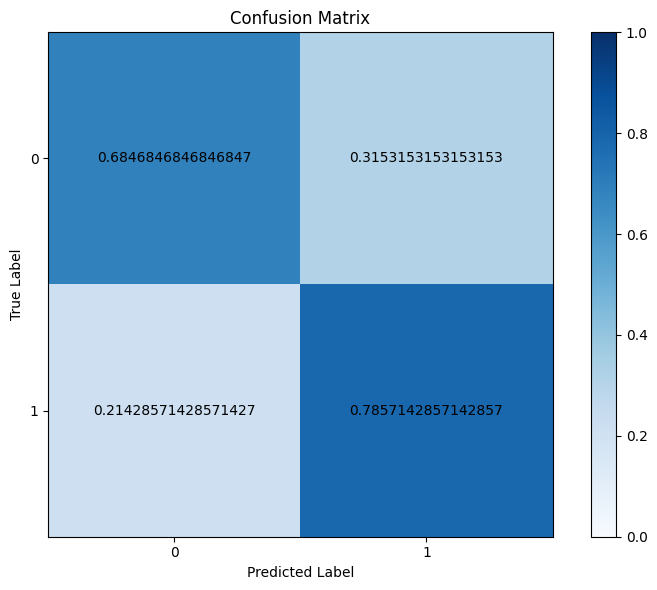

Training with batch size: 30, epochs: 15, learning rate: 0.001, seed: 44, latent dim: 20


/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/15: Reconstruction loss: 1.4350, Adversarial loss: 0.7889, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 2/15: Reconstruction loss: 0.6516, Adversarial loss: 0.7865, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 3/15: Reconstruction loss: 0.5453, Adversarial loss: 0.7815, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 4/15: Reconstruction loss: 0.5025, Adversarial loss: 0.7932, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 5/15: Reconstruction loss: 0.4762, Adversarial loss: 0.7951, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 6/15: Reconstruction loss: 0.4759, Adversarial loss: 0.8046, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 7/15: Reconstruction loss: 0.4484, Adversarial loss: 0.7914, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 8/15: Reconstruction loss: 0.4575, Adversarial loss: 0.7912, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 9/15: Reconstruction loss: 0.4404, Adversarial loss: 0.7926, lambda recon: 5.0000, lambda adv: 1.0000
Epoch 10/15: Reconstruction 

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_27 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5024 - loss: 1.0615 - val_accuracy: 0.5725 - val_loss: 0.7889
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5282 - loss: 0.9216 - val_accuracy: 0.6304 - val_loss: 0.6989
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5307 - loss: 0.8592 - val_accuracy: 0.6087 - val_loss: 0.6492
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.5825 - loss: 0.7532 - val_accuracy: 0.6087 - val_loss: 0.6366
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.5768 - loss: 0.7295 - val_accuracy: 0.6232 - val_loss: 0.6244
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5914 - loss: 0.6958 - val_accuracy: 0.6449 - val_loss: 0.6149
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.6228 - loss: 0.6539 - val_accuracy: 0.6449 - val_loss: 0.6136
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.6392 - loss: 0.6396 - val_accuracy: 0.66

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_28 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4818 - loss: 1.1100 - val_accuracy: 0.5000 - val_loss: 0.8596
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.5387 - loss: 0.9306 - val_accuracy: 0.5725 - val_loss: 0.7324
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.5817 - loss: 0.7949 - val_accuracy: 0.6304 - val_loss: 0.6777
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.5879 - loss: 0.7248 - val_accuracy: 0.6522 - val_loss: 0.6405
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.6221 - loss: 0.6809 - val_accuracy: 0.6884 - val_loss: 0.6265
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.6348 - loss: 0.6642 - val_accuracy: 0.6884 - val_loss: 0.6186
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6481 - loss: 0.6481 - val_accuracy: 0.6812 - val_loss: 0.6144
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.6591 - loss: 0.6314 - val_accuracy: 0.69

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_29 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5361 - loss: 0.7784 - val_accuracy: 0.5652 - val_loss: 0.6644
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5942 - loss: 0.7139 - val_accuracy: 0.5942 - val_loss: 0.6448
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6478 - loss: 0.6508 - val_accuracy: 0.6377 - val_loss: 0.6364
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.6711 - loss: 0.6210 - val_accuracy: 0.6449 - val_loss: 0.6278
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.6670 - loss: 0.6084 - val_accuracy: 0.6377 - val_loss: 0.6307
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6816 - loss: 0.6033 - val_accuracy: 0.6667 - val_loss: 0.6273
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.6913 - loss: 0.5876 - val_accuracy: 0.6667 - val_loss: 0.6193
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6864 - loss: 0.5926 - val_accuracy: 0.68

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_30 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5674 - loss: 1.0521 - val_accuracy: 0.5072 - val_loss: 1.0655
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.5880 - loss: 0.9348 - val_accuracy: 0.5652 - val_loss: 0.9405
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.6185 - loss: 0.8296 - val_accuracy: 0.5580 - val_loss: 0.8486
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.6216 - loss: 0.7641 - val_accuracy: 0.5797 - val_loss: 0.7830
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6160 - loss: 0.7384 - val_accuracy: 0.5725 - val_loss: 0.7326
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6307 - loss: 0.6931 - val_accuracy: 0.6159 - val_loss: 0.6982
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6392 - loss: 0.6608 - val_accuracy: 0.6159 - val_loss: 0.6789
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.6490 - loss: 0.6591 - val_accuracy: 0.63

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_31 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4684 - loss: 1.2831 - val_accuracy: 0.3696 - val_loss: 1.1084
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5018 - loss: 1.0005 - val_accuracy: 0.4420 - val_loss: 0.9082
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5236 - loss: 0.9103 - val_accuracy: 0.4928 - val_loss: 0.8045
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.5539 - loss: 0.7855 - val_accuracy: 0.5290 - val_loss: 0.7568
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.5930 - loss: 0.7199 - val_accuracy: 0.5580 - val_loss: 0.7193
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.6018 - loss: 0.7026 - val_accuracy: 0.5507 - val_loss: 0.7088
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6327 - loss: 0.6540 - val_accuracy: 0.5652 - val_loss: 0.6868
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.6280 - loss: 0.6368 - val_accuracy: 0.56

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_32 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5151 - loss: 1.1285 - val_accuracy: 0.7681 - val_loss: 0.5729
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5680 - loss: 0.8811 - val_accuracy: 0.7246 - val_loss: 0.6566
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.5832 - loss: 0.8045 - val_accuracy: 0.7029 - val_loss: 0.6793
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6220 - loss: 0.7267 - val_accuracy: 0.7029 - val_loss: 0.6817
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.6322 - loss: 0.6944 - val_accuracy: 0.7101 - val_loss: 0.6641
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.6364 - loss: 0.6837 - val_accuracy: 0.6957 - val_loss: 0.6566
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6346 - loss: 0.6449 - val_accuracy: 0.7029 - val_loss: 0.6399
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.6649 - loss: 0.6277 - val_accuracy: 0.68

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_33 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4233 - loss: 1.3208 - val_accuracy: 0.3913 - val_loss: 1.0362
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.4677 - loss: 1.0651 - val_accuracy: 0.4348 - val_loss: 0.9449
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.5067 - loss: 0.9471 - val_accuracy: 0.4638 - val_loss: 0.8558
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.5288 - loss: 0.8406 - val_accuracy: 0.4928 - val_loss: 0.7779
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.5859 - loss: 0.7543 - val_accuracy: 0.5072 - val_loss: 0.7421
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6157 - loss: 0.7014 - val_accuracy: 0.5362 - val_loss: 0.7062
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.6282 - loss: 0.6581 - val_accuracy: 0.6087 - val_loss: 0.6732
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6538 - loss: 0.6540 - val_accuracy: 0.65

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_34 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5580 - loss: 0.8617 - val_accuracy: 0.6522 - val_loss: 0.7710
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.5922 - loss: 0.7878 - val_accuracy: 0.6232 - val_loss: 0.7408
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6073 - loss: 0.7159 - val_accuracy: 0.6159 - val_loss: 0.7120
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.6264 - loss: 0.6857 - val_accuracy: 0.6014 - val_loss: 0.6850
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.6149 - loss: 0.6770 - val_accuracy: 0.5797 - val_loss: 0.6829
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.6259 - loss: 0.6392 - val_accuracy: 0.5725 - val_loss: 0.6805
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.6413 - loss: 0.6311 - val_accuracy: 0.5652 - val_loss: 0.6710
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6617 - loss: 0.6239 - val_accuracy: 0.56

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_35 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5034 - loss: 1.0196 - val_accuracy: 0.4855 - val_loss: 0.8195
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5310 - loss: 0.8536 - val_accuracy: 0.5725 - val_loss: 0.7571
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.6030 - loss: 0.7289 - val_accuracy: 0.5942 - val_loss: 0.7093
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.6385 - loss: 0.6717 - val_accuracy: 0.5942 - val_loss: 0.6903
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.6469 - loss: 0.6397 - val_accuracy: 0.6304 - val_loss: 0.6632
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.6792 - loss: 0.6166 - val_accuracy: 0.6377 - val_loss: 0.6400
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.6770 - loss: 0.6174 - val_accuracy: 0.6522 - val_loss: 0.6267
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.6764 - loss: 0.6053 - val_accuracy: 0.65

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_36 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5028 - loss: 0.9656 - val_accuracy: 0.6087 - val_loss: 0.6868
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.5763 - loss: 0.8441 - val_accuracy: 0.6449 - val_loss: 0.6754
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.5983 - loss: 0.7496 - val_accuracy: 0.6449 - val_loss: 0.6613
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.6255 - loss: 0.6962 - val_accuracy: 0.6667 - val_loss: 0.6586
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6511 - loss: 0.6652 - val_accuracy: 0.6522 - val_loss: 0.6524
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6580 - loss: 0.6369 - val_accuracy: 0.6522 - val_loss: 0.6513
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.6765 - loss: 0.6163 - val_accuracy: 0.6522 - val_loss: 0.6407
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6986 - loss: 0.5921 - val_accuracy: 0.65

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_37 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6246 - loss: 0.7648 - val_accuracy: 0.5362 - val_loss: 0.8393
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.6484 - loss: 0.7037 - val_accuracy: 0.5870 - val_loss: 0.7477
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.6370 - loss: 0.6630 - val_accuracy: 0.5942 - val_loss: 0.6992
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.6701 - loss: 0.6317 - val_accuracy: 0.6159 - val_loss: 0.6692
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.6518 - loss: 0.6276 - val_accuracy: 0.6087 - val_loss: 0.6509
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.6813 - loss: 0.5889 - val_accuracy: 0.6014 - val_loss: 0.6439
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.6651 - loss: 0.5957 - val_accuracy: 0.6159 - val_loss: 0.6453
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.7012 - loss: 0.5792 - val_accuracy: 0.62

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_38 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5625 - loss: 0.8130 - val_accuracy: 0.4493 - val_loss: 0.8846
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6171 - loss: 0.7060 - val_accuracy: 0.4928 - val_loss: 0.8345
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.6440 - loss: 0.6621 - val_accuracy: 0.5580 - val_loss: 0.7932
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.6689 - loss: 0.6361 - val_accuracy: 0.5580 - val_loss: 0.7621
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.6774 - loss: 0.6106 - val_accuracy: 0.5580 - val_loss: 0.7458
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6937 - loss: 0.6084 - val_accuracy: 0.5652 - val_loss: 0.7236
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6860 - loss: 0.6020 - val_accuracy: 0.5797 - val_loss: 0.7125
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.6947 - loss: 0.5880 - val_accuracy: 0.57

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_39 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5850 - loss: 0.8338 - val_accuracy: 0.4493 - val_loss: 0.8713
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6212 - loss: 0.7558 - val_accuracy: 0.5580 - val_loss: 0.7751
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.6473 - loss: 0.6840 - val_accuracy: 0.5942 - val_loss: 0.7189
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.6427 - loss: 0.6714 - val_accuracy: 0.6304 - val_loss: 0.6881
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.6796 - loss: 0.6291 - val_accuracy: 0.6304 - val_loss: 0.6779
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.6849 - loss: 0.6146 - val_accuracy: 0.6522 - val_loss: 0.6594
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.6994 - loss: 0.5932 - val_accuracy: 0.6594 - val_loss: 0.6471
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6920 - loss: 0.5909 - val_accuracy: 0.68

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_40 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4059 - loss: 1.2651 - val_accuracy: 0.3913 - val_loss: 1.0666
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.4381 - loss: 0.9610 - val_accuracy: 0.4058 - val_loss: 0.8788
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.4900 - loss: 0.8184 - val_accuracy: 0.4928 - val_loss: 0.7454
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.5712 - loss: 0.7257 - val_accuracy: 0.6522 - val_loss: 0.6632
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.6365 - loss: 0.6566 - val_accuracy: 0.6667 - val_loss: 0.6304
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6643 - loss: 0.6349 - val_accuracy: 0.6739 - val_loss: 0.6171
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6575 - loss: 0.6200 - val_accuracy: 0.6812 - val_loss: 0.6026
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.6841 - loss: 0.6099 - val_accuracy: 0.70

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_41 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4572 - loss: 1.3438 - val_accuracy: 0.7029 - val_loss: 0.6258
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5011 - loss: 0.9859 - val_accuracy: 0.6522 - val_loss: 0.6236
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.5711 - loss: 0.7950 - val_accuracy: 0.6377 - val_loss: 0.6418
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6148 - loss: 0.7021 - val_accuracy: 0.6159 - val_loss: 0.6521
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6429 - loss: 0.6566 - val_accuracy: 0.6159 - val_loss: 0.6510
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6617 - loss: 0.6378 - val_accuracy: 0.6449 - val_loss: 0.6568
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6804 - loss: 0.6113 - val_accuracy: 0.6812 - val_loss: 0.6459
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.6820 - loss: 0.6071 - val_accuracy: 0.67

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_42 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4856 - loss: 1.1028 - val_accuracy: 0.4493 - val_loss: 0.9563
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.5238 - loss: 0.9426 - val_accuracy: 0.5145 - val_loss: 0.8022
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.5600 - loss: 0.7988 - val_accuracy: 0.5797 - val_loss: 0.7126
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6099 - loss: 0.7083 - val_accuracy: 0.5725 - val_loss: 0.6578
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.6361 - loss: 0.6720 - val_accuracy: 0.5870 - val_loss: 0.6439
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.6606 - loss: 0.6303 - val_accuracy: 0.6304 - val_loss: 0.6264
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.6560 - loss: 0.6199 - val_accuracy: 0.6594 - val_loss: 0.6193
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.6854 - loss: 0.5996 - val_accuracy: 0.64

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_43 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
 1/73 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.5667 - loss: 0.8985

2025-03-22 00:48:34.326827: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [0] vs. [2]
	 [[{{function_node __inference_one_step_on_data_55720398}}{{node adam/truediv_3}}]]


InvalidArgumentError: Graph execution error:

Detected at node adam/truediv_3 defined at (most recent call last):
  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/runpy.py", line 86, in _run_code

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/ds/_m8m03r135b5r67hc6xgtxt00000gn/T/ipykernel_74846/976906410.py", line 51, in <module>

  File "/Users/inescunha/Documents/GitHub/CellFate/src/training/new_optimised_train.py", line 520, in train_cellfate

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 73, in train_step

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py", line 291, in apply_gradients

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py", line 356, in apply

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py", line 419, in _backend_apply_gradients

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/optimizer.py", line 121, in _backend_update_step

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/optimizer.py", line 135, in _distributed_tf_update_step

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/optimizer.py", line 132, in apply_grad_to_update_var

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/optimizers/adam.py", line 147, in update_step

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/ops/numpy.py", line 5553, in divide

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/sparse.py", line 780, in sparse_wrapper

  File "/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/backend/tensorflow/numpy.py", line 2246, in divide

Incompatible shapes: [0] vs. [2]
	 [[{{node adam/truediv_3}}]] [Op:__inference_one_step_on_iterator_55720429]

In [3]:
seed = 42
latent_space_dim = [2, 5, 10, 100] #5, 10, 100

for dim in latent_space_dim:

    np.random.seed(seed)
    confusion_matrices_cellfate = np.zeros((len(latent_space_dim), 2, 2))

    output_dir=f"../results/ls_dimension_study/seed{seed}_dim{dim}"
    os.makedirs(output_dir, exist_ok=True)
    
    config_ae = {
                'batch_size': 30,
                'epochs': 15,
                'learning_rate': 0.001,
                'seed': seed,
                'latent_dim': dim,
                'GaussianNoise_std': 0.003,
                'lambda_recon': 5,
                'lambda_adv': 1,
            }

    config_cellfate = {
        'batch_size': 30,
        'epochs': 100,
        'learning_rate': 0.001,
        'seed': seed,
        'latent_dim': dim,
        'GaussianNoise_std': 0.003,
        'lambda_recon': 6,
        'lambda_adv': 4,
        'lambda_cov': 0.0001,
        'lambda_contra': 8,
    }

    config_clf = {
        'batch_size': 30,
        'epochs': 50,
        'learning_rate': 0.001,
        'seed': seed,
        'latent_dim': dim,
    }

    results_autoencoder = train_autoencoder(config_ae, x_train)
    encoder = results_autoencoder['encoder']
    decoder = results_autoencoder['decoder']
    discriminator = results_autoencoder['discriminator']

    # IMAGES: Train AIcellfate with smaller dataset

    results_cellfate = train_cellfate(config_cellfate, encoder, decoder, discriminator, x_train, y_train, x_test, y_test) #lambda_recon=scaled_autoencoder_results['lambda_recon'], lambda_adv=scaled_autoencoder_results['lambda_adv']
    encoder = results_cellfate['encoder']
    decoder = results_cellfate['decoder']
    discriminator = results_cellfate['discriminator']

    save_model_weights_to_disk(encoder, decoder, discriminator, output_dir=output_dir)

    evaluator = Evaluation(output_dir)

    # Evaluate the model (and saving everything)
    z_imgs = encoder.predict(x_train)
    recon_imgs = decoder.predict(z_imgs)
    evaluator.reconstruction_images(x_train, recon_imgs[:,:,:,0], epoch=0)
    evaluator.visualize_latent_space(z_imgs, y_train, epoch=0)
   
    tf.keras.utils.set_random_seed(config_clf['seed'])

    classifier = mlp_classifier(latent_dim=config_clf['latent_dim'])
    classifier.compile(loss='sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=config_clf['learning_rate']), metrics=['accuracy'])

    x_val, x_test_, y_val, y_test_ = train_test_split(encoder.predict(x_test), y_test, test_size=0.5, random_state=42) 
    history = classifier.fit(encoder.predict(x_train), y_train, batch_size=config_clf['batch_size'], epochs=config_clf['epochs'], validation_data=(x_val, y_val)) 

    y_pred = classifier.predict(x_test_)
    y_pred_classes = np.argmax(y_pred, axis=1)
    num_classes = len(np.unique(y_test_))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_, y_pred_classes)

    class_sums = cm.sum(axis=1, keepdims=True)
    conf_matrix_normalized = cm / class_sums

    confusion_matrices_cellfate[latent_space_dim.index(dim)] = conf_matrix_normalized

    # Save confusion matrix
    plot_confusion_matrix(y_test_, y_pred, num_classes)
    np.save(f"{output_dir}/confusion_matrices_cellfate.npy", confusion_matrices_cellfate)

    

## 3-dimensional Latent Space 

In [5]:
config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 3,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 6,
    'lambda_adv': 4,
    'lambda_cov': 0.0001,
    'lambda_contra': 8,
}

img_shape = (x_train.shape[1], x_train.shape[2], 1)
encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/dim3/encoder.weights.h5")
decoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/dim3/decoder.weights.h5")


In [6]:
latent_space = encoder.predict(x_train)
cor_vals = [np.corrcoef(np.eye(2)[y_train][:, 0], latent_space[:, i])[0, 1] for i in range(latent_space.shape[1])]
cor_vals = np.array(cor_vals)
feat_0, feat_1 = np.argsort(np.abs(cor_vals))[-2:] 

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


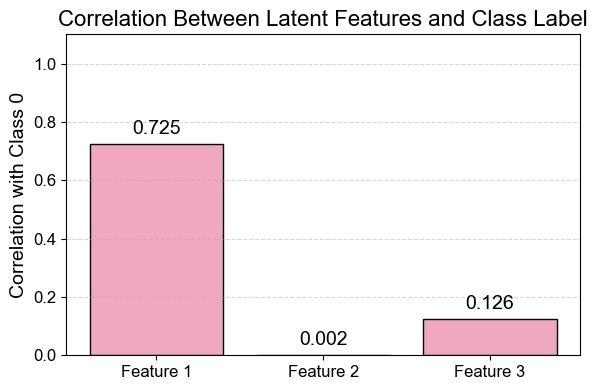

In [7]:
# X-axis: Feature indices (0 to 99)
feature_indices = np.arange(len(cor_vals))

plt.figure(figsize=(6, 4))
bars = plt.bar(feature_indices, abs(cor_vals), color="#F0A7C1", edgecolor='black')

# Add value labels on top of each bar (3 decimal places)
for bar, value in zip(bars, abs(cor_vals)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{value:.3f}",
             ha='center', va='bottom', fontsize=14, fontname='Arial')  # Increased fontsize

# Formatting with Arial font
#plt.xlabel("Latent Feature Index", fontsize=14, fontname='Arial')
plt.ylabel("Correlation with Class 0", fontsize=14, fontname='Arial')
plt.title("Correlation Between Latent Features and Class Label", fontsize=16, fontname='Arial')
plt.xticks(ticks=[0, 1, 2], labels=["Feature 1", "Feature 2", "Feature 3"], fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.ylim(0, 1.1)  # Add a little space for the text above bars

# Optional: Save plot
#plt.savefig("bar_plot_3dim.eps", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [8]:
correlation_matrix = np.corrcoef(latent_space.T)  # shape: (3, 3)
print(correlation_matrix)

[[ 1.          0.09804284 -0.04808996]
 [ 0.09804284  1.          0.09749571]
 [-0.04808996  0.09749571  1.        ]]


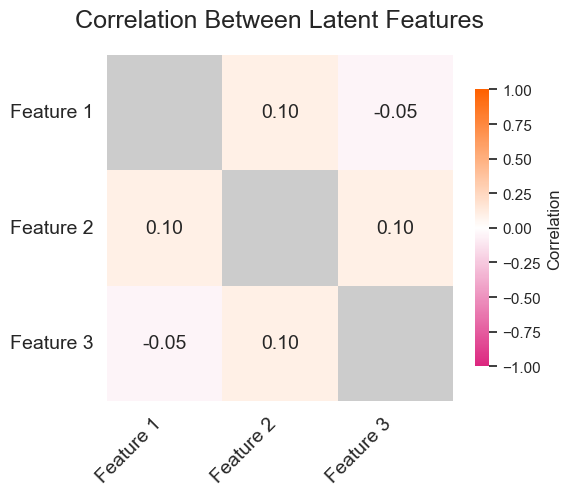

In [9]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Example correlation matrix (replace with your own, flexible to any size)
#correlation_matrix = np.random.uniform(-1, 1, size=(5, 5))
np.fill_diagonal(correlation_matrix, 1.0)

# Create annotation labels with 2 decimals only for off-diagonal
annot_labels = correlation_matrix.copy().astype(str)
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i == j:
            annot_labels[i, j] = ""  # Leave diagonal empty
        else:
            annot_labels[i, j] = f"{correlation_matrix[i, j]:.2f}"  # Format to 2 decimals

# Define custom colormap: magenta → white → orange
custom_cmap = LinearSegmentedColormap.from_list("magenta_orange", ['#DC267F', '#FFFFFF', '#FE6100'])

# Generate tick labels based on matrix size
feature_labels = [f"Feature {i+1}" for i in range(correlation_matrix.shape[0])]

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.set(font="Arial")

ax = sns.heatmap(correlation_matrix,
                 annot=annot_labels,
                 fmt='',
                 cmap=custom_cmap,
                 square=True,
                 xticklabels=feature_labels,
                 yticklabels=feature_labels,
                 vmin=-1, vmax=1,
                 cbar_kws={"shrink": 0.8, "label": "Correlation"},
                 linewidths=0,
                 linecolor='none',
                 annot_kws={"fontsize": 14, "fontname": "Arial"})

# Light gray diagonal squares
for i in range(correlation_matrix.shape[0]):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color="#CCCCCC", linewidth=0))

# Formatting
plt.xticks(fontsize=14, fontname="Arial", rotation=45, ha='right')
plt.yticks(fontsize=14, fontname="Arial", rotation=0)
plt.title("Correlation Between Latent Features", fontsize=18, fontname="Arial", pad=20)

plt.tight_layout()

# Save high-res figure (optional)
#plt.savefig("feature_correlation_2dim.eps", dpi=300, bbox_inches="tight")

plt.show()


(3, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(3, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
(3, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(3, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(3, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


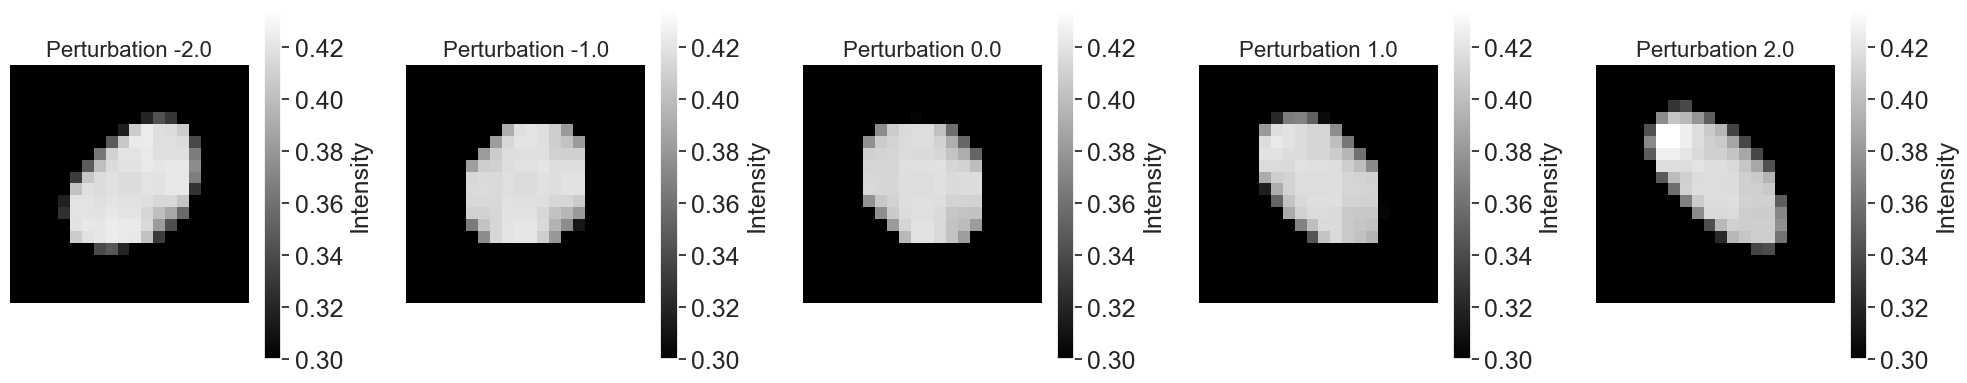

In [11]:
# Load the models after all the training and check the perturbations
baseline_latent_vector = np.zeros((latent_space.shape[1], latent_space.shape[1]), dtype=np.float32)  # Start with a neutral latent vector

# Choose the feature to perturb (e.g., feature 0)
feature_index = 1

# Perturbation range
perturbations = np.linspace(-2, 2, 5) # feature index 0

# Store the perturbed reconstructions
perturbed_reconstructions = []

for value in perturbations:
    # Create a copy of the baseline latent vector
    perturbed_vector = baseline_latent_vector.copy()
    print(perturbed_vector.shape)
    # Modify the selected feature
    perturbed_vector[0, feature_index] = value
    
    # Decode the perturbed vector to generate a synthetic image
    synthetic_image = decoder.predict(perturbed_vector)  # Assuming 'decoder' is your trained decoder model
    
    # Store the result
    perturbed_reconstructions.append(synthetic_image[0])  # Assuming decoder outputs (batch_size, height, width, channels)

# Convert list to numpy array for easier handling
perturbed_reconstructions = np.array(perturbed_reconstructions)

# Plot the results
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
vmin = perturbed_reconstructions.min()
vmax = perturbed_reconstructions.max()

for i in range(5):
    im = axs[i].imshow(perturbed_reconstructions[i, :, :, 0], cmap='gray', vmin=0.3, vmax=vmax)
    axs[i].set_title(f'Perturbation {perturbations[i]}', fontsize=16)  # Increase title font size
    axs[i].axis('off')
    
    cbar = fig.colorbar(im, ax=axs[i])
    cbar.ax.tick_params(labelsize=18)  # Increase tick label font size
    cbar.ax.set_ylabel('Intensity', fontsize=18)  # Add and style colorbar label (optional)

plt.tight_layout()
plt.savefig("perturbations_feat1.eps", dpi=300, bbox_inches="tight")
plt.show()



### Precision plot

In [44]:
# Load encoder, decoder and calculate conf matrix (repeate and save these for the seeds 42, 43 and 44, for the dimensions 2, 3, 5 and 10)

config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
}

img_shape = (x_train.shape[1], x_train.shape[2], 1)
encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed43_dim2/encoder.weights.h5")
decoder.load_weights("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed43_dim2/decoder.weights.h5")

tf.keras.utils.set_random_seed(config['seed'])

classifier = mlp_classifier(latent_dim=config['latent_dim']) #[:, [3, 8]] 

# Train the classifier
classifier.compile(loss='sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=config['learning_rate']), metrics=['accuracy'])
classifier.summary()

x_val, x_test_, y_val, y_test_ = train_test_split(encoder.predict(x_test), y_test, test_size=0.5, random_state=42) # 42 random state

history = classifier.fit(encoder.predict(x_train), y_train, batch_size=config['batch_size'], epochs=config['epochs'], validation_data=(x_val, y_val)) # 

num_classes = len(np.unique(y_train))
y_pred = classifier.predict(x_test_)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test_, y_pred_classes)

class_sums = cm.sum(axis=1, keepdims=True)
conf_matrix_normalized_dim2 = cm / class_sums


print(conf_matrix_normalized_dim2)

/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/interpret/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_50 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6404 - loss: 0.6271 - val_accuracy: 0.5725 - val_loss: 0.7352
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.6602 - loss: 0.5966 - val_accuracy: 0.6014 - val_loss: 0.6816
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7082 - loss: 0.5674 - val_accuracy: 0.6159 - val_loss: 0.6482
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.6955 - loss: 0.5808 - val_accuracy: 0.6594 - val_loss: 0.6267
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7058 - loss: 0.5577 - val_accuracy: 0.6594 - val_loss: 0.6162
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.7026 - loss: 0.5741 - val_accuracy: 0.6594 - val_loss: 0.6108
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.7250 - loss: 0.5488 - val_accuracy: 0.6594 - val_loss: 0.6110
Epoch 8/50
73/73 ━━━━━━━━━━━━

In [ ]:
#np.save(f"/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed43_dim2/confusion_matrix.npy", conf_matrix_normalized_dim2)

In [ ]:
ls_dimensions = [2, 3, 5, 10]
seeds = [42, 43, 44]
confusion_matrices = np.zeros((len(seeds), len(ls_dimensions), 2, 2))

# SEED 42
confusion_matrices[0, 0] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/dim2/confusion_matrix.npy")
confusion_matrices[0, 1] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/dim3/confusion_matrix.npy")
confusion_matrices[0, 2] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/dim5/confusion_matrices_cellfate.npy")[0]
confusion_matrices[0, 3] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/dim10/confusion_matrices_cellfate.npy")[1]


In [47]:
seed = 43
confusion_matrices[1, 0] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed43_dim2/confusion_matrix.npy")
confusion_matrices[1, 1] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed43_dim3/confusion_matrices_cellfate.npy")[0]
confusion_matrices[1, 2] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed43_dim5/confusion_matrices_cellfate.npy")[1]
confusion_matrices[1, 3] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed43_dim10/confusion_matrices_cellfate.npy")[2]


In [56]:
seed = 44
confusion_matrices[2, 0] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed44_dim2/confusion_matrices_cellfate.npy")[0]
confusion_matrices[2, 1] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed44_dim3/confusion_matrices_cellfate.npy")[0]
confusion_matrices[2, 2] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed44_dim5/confusion_matrices_cellfate.npy")[0]
confusion_matrices[2, 3] = np.load("/Users/inescunha/Documents/GitHub/CellFate/results/ls_dimension_study/seed44_dim10/confusion_matrices_cellfate.npy")[1]


In [57]:
confusion_matrices[2]

array([[[0.68468468, 0.31531532],
        [0.21428571, 0.78571429]],

       [[0.4954955 , 0.5045045 ],
        [0.32142857, 0.67857143]],

       [[0.71171171, 0.28828829],
        [0.46428571, 0.53571429]],

       [[0.67567568, 0.32432432],
        [0.28571429, 0.71428571]]])

In [60]:
# Get confusion matrices and plot precisions 

precision_cellfate = np.zeros((4, 3))
accuracy_cellfate = np.zeros((4, 3))
false_positives_cellfate = np.zeros((4, 3))
false_negatives_cellfate = np.zeros((4, 3))

for size in range(confusion_matrices.shape[1]):
    for seed in range(confusion_matrices.shape[0]):
        conf_matrix = confusion_matrices[seed, size]
        precision_cellfate[size, seed] = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[1,0])
        accuracy_cellfate[size, seed] = (conf_matrix[0,0] + conf_matrix[1,1]) / np.sum(conf_matrix)
        false_positives_cellfate[size, seed] = conf_matrix[1,0] #/ np.sum(conf_matrix[1,:])
        false_negatives_cellfate[size, seed] = conf_matrix[0,1] #/ np.sum(conf_matrix[0,:])

In [62]:
mean_precisions = np.mean(precision_cellfate, axis=1)
std_precisions = np.std(precision_cellfate, axis=1)

mean_accuracies = np.mean(accuracy_cellfate, axis=1)
std_accuracies = np.std(accuracy_cellfate, axis=1)

mean_false_positives = np.mean(false_positives_cellfate, axis=1)
std_false_positives = np.std(false_positives_cellfate, axis=1)

mean_false_negatives = np.mean(false_negatives_cellfate, axis=1)
std_false_negatives = np.std(false_negatives_cellfate, axis=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


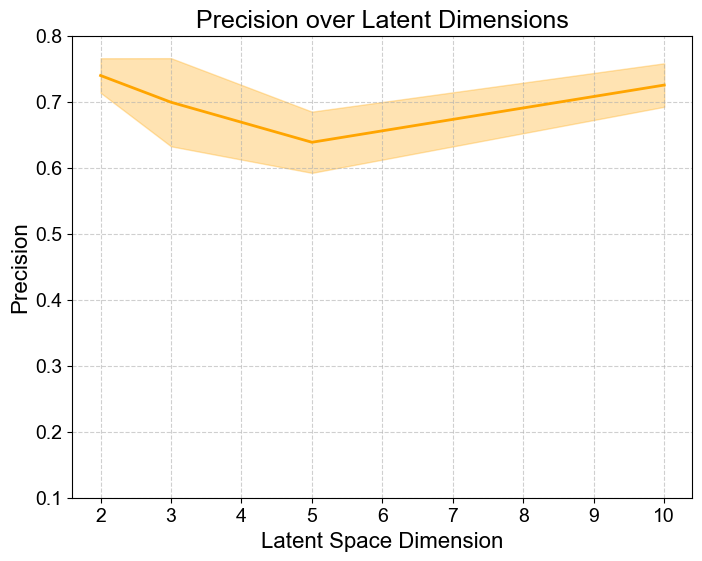

In [ ]:
sizes = [2, 3, 5, 10]

# Plot
plt.figure(figsize=(8, 6))

# Precision (orange)
plt.plot(sizes, mean_precisions, color='orange', linewidth=2, label='Precision')
plt.fill_between(sizes, mean_precisions - std_precisions, mean_precisions + std_precisions,
                 color='orange', alpha=0.3)

# Accuracy (purple)
# plt.plot(sizes, mean_accuracies, color='purple', linewidth=2, label='Accuracy')
# plt.fill_between(sizes, mean_accuracies - std_accuracies, mean_accuracies + std_accuracies,
#                  color='purple', alpha=0.3)

# # False Positives (green)
# plt.plot(sizes, mean_false_positives, color='green', linewidth=2, label='False Positives')
# plt.fill_between(sizes, mean_false_positives - std_false_positives, mean_false_positives + std_false_positives,
#                  color='green', alpha=0.3)

# # False Negatives (blue)
# plt.plot(sizes, mean_false_negatives, color='blue', linewidth=2, label='False Negatives')
# plt.fill_between(sizes, mean_false_negatives - std_false_negatives, mean_false_negatives + std_false_negatives,
#                  color='blue', alpha=0.3)

# Formatting
plt.xlabel("Latent Space Dimension", fontsize=16, fontname="Arial")
plt.ylabel("Precision", fontsize=16, fontname="Arial")
plt.title("Precision over Latent Dimensions", fontsize=18, fontname="Arial")
plt.xticks(fontsize=14, fontname="Arial")
plt.yticks(fontsize=14, fontname="Arial")
plt.ylim(0.1, 0.8)  # Set y-axis range
plt.grid(True, linestyle="--", alpha=0.6)
#plt.legend(fontsize=14)
# Save the figure with high quality
#plt.savefig("latent_dim_precision.eps", dpi=300, bbox_inches="tight")
plt.show()